In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your clustered DataFrame (adjust path as needed)
# If you already have df_clustered in memory, skip this cell
data_path = '../../data/nifty/train/featured.csv'
df = pd.read_csv(data_path)

# Re-run clustering if needed (same as before)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = [
    'daily_return', 'log_return', 'price_range',
    'ma_5', 'ma_20', 'volatility_5', 'volatility_20',
    'rsi_14', 'macd_12_26', 'macd_signal_12_26', 'macd_histogram_12_26',
    'stoch_14', 'stoch_smoothk', 'stoch_smoothd'
]
X = df[features].dropna().copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3  # Use the number of clusters you chose previously
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clustered = df.loc[X.index].copy()
df_clustered['cluster'] = clusters

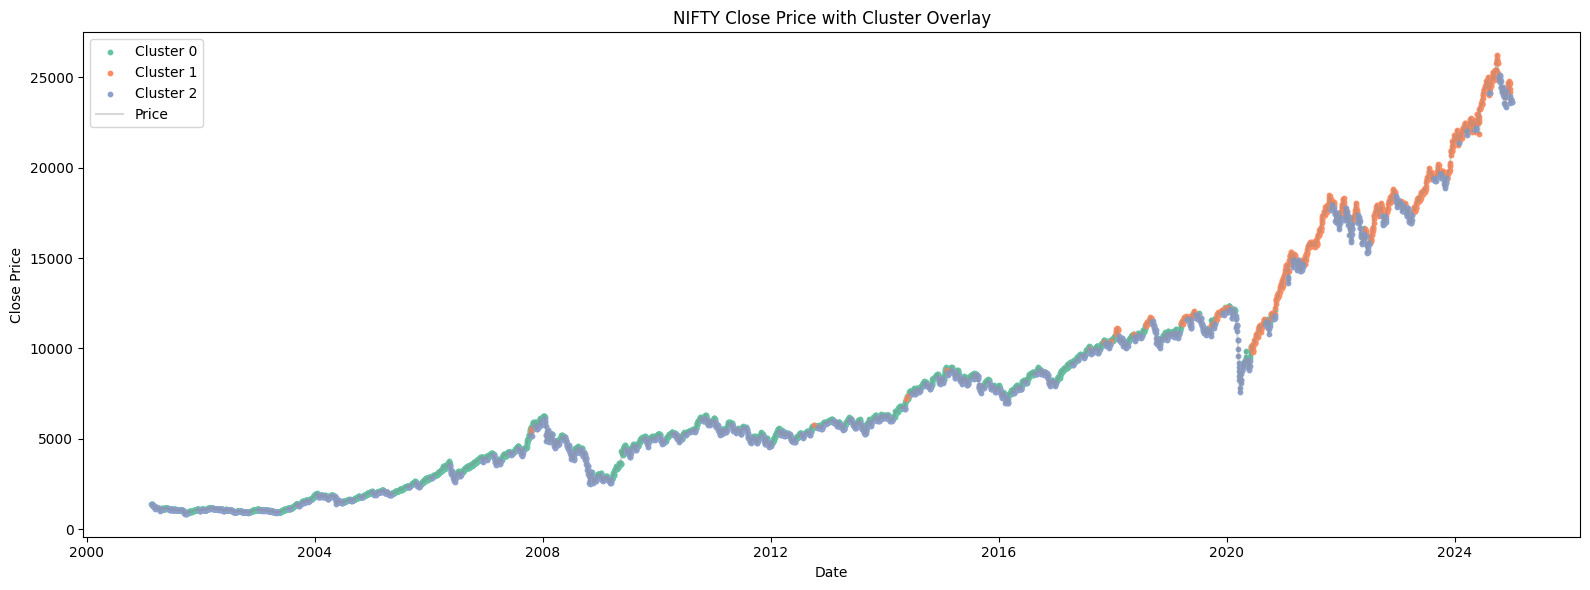

In [2]:
import matplotlib.dates as mdates

# Convert 'date' column to datetime if not already
df_clustered['date'] = pd.to_datetime(df_clustered['date'])

plt.figure(figsize=(16, 6))
palette = sns.color_palette('Set2', n_colors=df_clustered['cluster'].nunique())

for cluster in sorted(df_clustered['cluster'].unique()):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster]
    plt.scatter(
        cluster_data['date'],
        cluster_data['close'],
        label=f'Cluster {cluster}',
        s=10,
        color=palette[cluster]
    )

plt.plot(df_clustered['date'], df_clustered['close'], color='gray', alpha=0.3, label='Price')
plt.title('NIFTY Close Price with Cluster Overlay')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()